<a href="https://colab.research.google.com/github/mmcuri/ds_handson/blob/master/Violence_on_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Violence on Rio de Janeiro City

Rio de Janeiro, Brazil’s second largest city, well known for its natural settings, Carnival, samba, bossa nova and iconic beaches. Rio is also home to a travelers’ bucket-list mainstay.

Amid all the city glamour, Rio de Janeiro is one of Brazil's most violent states and vast areas are under the control of criminals, many of them linked to powerful drug-trafficking gangs. 

On 28 October 2018, Wilson Witzel was elected Governor of the State of Rio de Janeiro with a four-year term beginning in January 2019. During his campaing the main promise was to implement hardline measures to tackle violence.

Since he took office, the state observed the rise on policies that include the use of heavily armed agents and helicopter-borne snipers to fight criminals in densely populated areas.

The purpose of this analysis is to identify the positive and negative impacts of the implementation of security hardline measures for the population of Rio de Janeiro.

![alt text](https://raw.githubusercontent.com/mmcuri/ds_handson/master/img/rio-de-janeiro-night-panorama-1400x500.jpg)

## The Data

Rio de Janeiro state government publishes on a monthly basis the time series of security statistics on the region throughout the portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br). The complete dataset data can be downloaded [here](http://www.ispdados.rj.gov.br/estatistica.html).


These official records started to be tracked and maintained since 1991, after that different other variables started to be collected. We will notice many blank spaces' values which will require our attention and proper handling.


### *Data Dictionary*

We are going to focus on the variables which will be used in this analysis.
The complete [data dictionary](http://www.ispdados.rj.gov.br/Arquivos/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx) (in Portuguese) can be found on [ISP Dados Abertos](http://www.ispdados.rj.gov.br) website.
*   `ano` - Occurrence reporting year
*   `mes` - Occurrence reporting month
*   `hom_por_interv_policial`- Death by **state agent intervention**
*   `hom_doloso`: Total of registered **murders** per month
*   `total_roubos`: Total of registered **threats** per month
*   `total_furtos`: Total of registered **robberies** per month






### *Importing the Data and Libraries*

For this analysis we will be using Pandas, Seaborn, Numpy and Matplotbib libraries.

In [66]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/mmcuri/ds_handson/master/data/DOMensalEstadoDesde1991_2020-05.csv", sep=";")

## Getting Started

Before jumping into the exploratory data analysis, let's answer a few questions to familiarize ourselves with the *dataset* we will be studying and identify problems that may require proper handling.

### *Dataframe size and info*

In [68]:
print('Dataset dimensions',
      '\n# Attributes: ', df.shape[1], 
      '\n# Entries: ', df.shape[0],'\n')

Dataset dimensions 
# Attributes:  58 
# Entries:  353 



### *What are the attributes and their data types?*

Many attributes got imported by Pandas as `object` data type. The reason for that is because some variables that have a bunch of not populated entries were imported as `string`, with a blank space.

In [69]:
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

### *Showing up some rows*

By displaying first entries of the dataset we can notice that it the `null` values got imported as *blank spaces*. This can hinder the data analysis and has to be treated.

In [70]:
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


### *Handling blank spaces*

In order to handle the blank spaces in the dataframe, we are going to replace all the blank values by `null` value. We will take advantage of regex to help  finding any number of space character that might be on the attribute value.

In [71]:
# replacing all the blank values with NaN 
df = df.replace(r'^\s*$', np.nan, regex=True)

### *Converting data types*
As we saw above, many attributes got imported by Pandas as `object` data type. We need to give proper handling to such attributes, otherwise it will impact during our exploratory analysis. 

By verifying the original *csv* file, we will notice that all the entries have numeric values, hence we can handle those values as `int` or `float` data types. By using `df.apply(pd.to_numeric)` functions, pandas apply the conversion on the whole **dataframe**.

In [ ]:
# first verify the output
df.apply(pd.to_numeric).info()

# apply the dtypes conversion
df = df.apply(pd.to_numeric)

### *Handling date*

The dataframe give us year and month information as different attributes - `ano` and `mes`. Such format does not help us during data manipulation, hence in order to handle that we will be creating a new column `date` as a result of `ano` and `mes` concatenation. 
After that we will parse the variable type to a *datetime*, and finally we will set the variable as the dataframe index. 

In [73]:
df['date'] = df['ano'].map(str) + '-' + df['mes'].map(str)

df.date = pd.to_datetime(df.date)
df.set_index(df.date, inplace=True)

### *Missing values rate*

The quality of a dataset is directly related to the amount of missing values. It is important to understand early on whether these *null* values are significant compared to the total entries.

It can be helpful to understand a little bit about the context and backgroud history of the dataset we are studying. It will drive us to better decisions and on the exploratory analysis, hence we will be able to get better insights.

Let's find out the missing values rate of the dataset.


In [ ]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

## Statistics Information about violence on Rio de Janeiro

On 28 October 2018, Wilson Witzel was elected Governor of the State of Rio de Janeiro with a four-year term beginning in January 2019. Since then the state observed the rise of policies that include the use of **heavily armed agents** and **helicopter-borne snipers** to fight criminals in densely populated areas.

The purpose of this analysis is to identify the impacts for the Rio de Janeiro population since the implementation of **hardline measures to tackle violence**. 

We are going to delimitate our analysis from the year of 2000 onwards. For that, let's create a new dataframe containing only the relevant data.

In [75]:
df_violence_rj = pd.DataFrame(df['2000-01-01':])

### *Police killings reach records*

In order to analyze the rise of police killings across the years, we are going to use the following attribute from the *dataset*:

*   `hom_por_interv_policial`: deaths by intervention of state agents

Let's do a comparison year-by-year grouping by the total of deaths by intervention of state agents per year. Then we will plot a bar graph to visualize total cumulative policy killings per year:

Text(0.5, 0, 'Year')

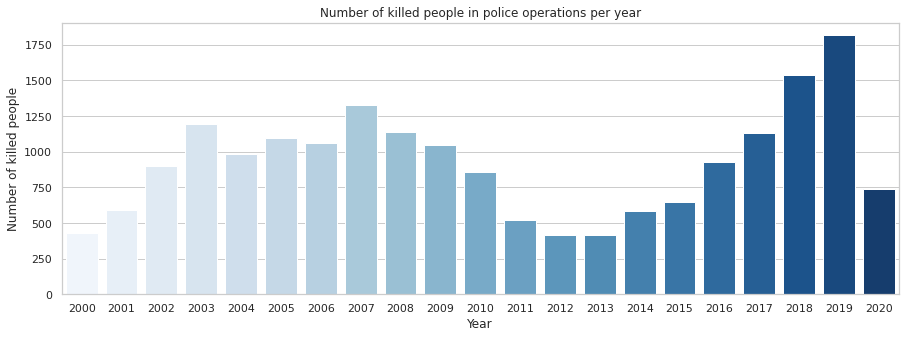

In [88]:
# plot bar graph year x police killings
df_hom_por_interv_policial_year = pd.DataFrame(df_violence_rj.groupby("ano")["hom_por_interv_policial"].sum())

fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.barplot(
    x=df_hom_por_interv_policial_year.index, 
    y="hom_por_interv_policial", 
    data=df_hom_por_interv_policial_year,
    palette="Blues"
)

ax.set_title("Number of killed people in police operations per year")
ax.set_ylabel("Number of killed people")
ax.set_xlabel("Year")

The graph above demonstrate the huge discrepancy on the number of **people being killed during police raids** specially on the year of 2019 - year where Mr. Witzel took office in Rio de Janeiro. 

#### *Police killing numbers in 2019*

On the first year of the governor Wilson Witzel on the administration of Rio de Janeiro, the state could observe a dramatical increase on the police killings numbers during raids, as seen on the graph above. Let's now focus the analysis in 2019 - we will calculate the following:

*   Total of police killings **within the year**
*   Average of police killings per month
*   Month where most cases of police killings were registered
*   The rise of police killings in 2019 compared with 2018


In [77]:
# total of police killings within 2019
print("Total of killed people in 2019: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.sum()))
# average of police killings within 2019
print("Average of killed people per month in 2019: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.mean()))
# month with most registered police killings within 2019
print("Record of killed people whithin a month: {}".format(df_violence_rj['2019-01-01':'2019-12-01'].hom_por_interv_policial.max()))

Total of killed people in 2019: 1814.0
Average of killed people per month in 2019: 151.16666666666666
Record of killed people whithin a month: 195.0


In [78]:
# rise of police killings in 2019 compared with 2018
total_hom_por_interv_policial_2019 = df_hom_por_interv_policial_year.loc[2019].hom_por_interv_policial
total_hom_por_interv_policial_2018 = df_hom_por_interv_policial_year.loc[2018].hom_por_interv_policial

hom_por_interv_policial_inc = (1 - total_hom_por_interv_policial_2018 / total_hom_por_interv_policial_2019) * 100

print("In 2019, the number of killed people during police operations increased {}% compared to 2018".format(
    hom_por_interv_policial_inc.round(2)))

In 2019, the number of killed people during police operations increased 15.44% compared to 2018


The results catch our attention:

*   In 2019, **1,814** people were killed by policemen
*   In average, **151** people were killed by policeman per month 
*   The month of July 2019 registered a record of deaths withing the year, totalling a **195 lost lifes** during a single month
*   In 2019, the number of killed people during police operations increased **15.44%** compared to previous year

### *Did the violence really drop?*

Officials say the approach from Mr. Witzel has worked, citing a drop in violent crime. But the question that comes to mind is: **did the violence really drop because of the hardline measures implemented by the governor at cost of so many lives?**

Now we are going to verify based on official published numbers if there was a significant drop on the violence since the **policy of confrontation approach** was implemented as part of administration strategy of Mr. Witzel or if this trend was already in place before.

In order to analyze if violence really dropped in Rio de Janeiro, the following attributes were choosed from the *dataset*:

*   `hom_doloso`: total of registered **muders** per month
*   `total_roubos`: total of registered **threats** per month
*   `total_furtos`: total of registered **robberies** per month

#### *Murders Rate*
A line graph is our preferred tool to track changes of variables over the time. Let's take adtantage of it and plot the murders rate over the time from 2015 onwards. We will also calculate variation between murders rate in 2019 compared with 2018.

Text(0, 0.5, 'Number of murder cases')

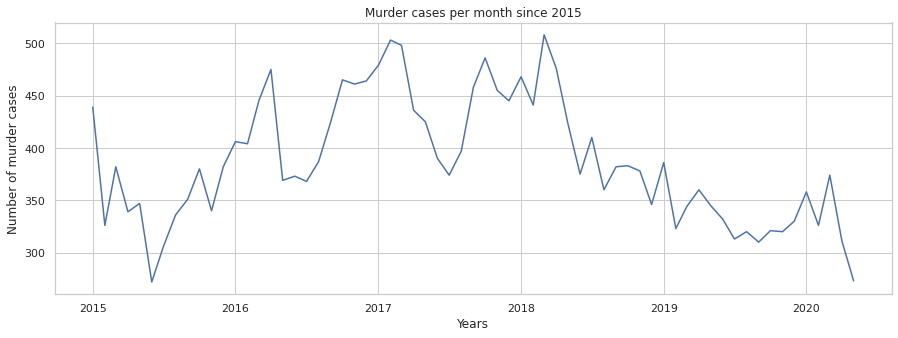

In [79]:
# plot line graph of murders since 2015
fig, ax = plt.subplots(figsize=(15, 5))

ax=sns.lineplot(x='date', y='hom_doloso' ,data=df_violence_rj['2015-01-01':])
ax.set_title("Murder cases per month since 2015")
ax.set_xlabel("Years")
ax.set_ylabel("Number of murder cases")

From the graph we can see the murders rate varies across the years by different reasons - coming from social to political aspects.

However, catch out attention the trend of a descent movement in place since the beginning of 2018, so that's why we are going to analyse:
 
*   murders variation within 2018  
*   murders variation of 2019 compared with 2018


In [80]:
# calculating the percentage variation of murders rate between 2018
min_hom_doloso_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].hom_doloso.min()
max_hom_doloso_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].hom_doloso.max()

total_hom_doloso_2018 = (1 - min_hom_doloso_2018 / max_hom_doloso_2018) * 100

print("Variation of murders rate within 2018: {}%".format(total_hom_doloso_2018))

Variation of murders rate within 2018: 31.88976377952756%


In [81]:
# calculating the percentage variation of murders rate between 2018 and 2019
total_hom_doloso_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].hom_doloso.sum()
total_hom_doloso_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].hom_doloso.sum()

total_hom_doloso_inc = (1 - total_hom_doloso_2018 / total_hom_doloso_2019) * 100

print("Variation of murders rate in between 2018/2019: {}%".format(total_hom_doloso_inc.round(2)))

Variation of murders rate in between 2018/2019: -23.63%


The variation of murders rate in between 2018/2019 was -23.63%, however as we saw on the graph this trend was already being observed since the end 2017, where such kind of hardline measured were not in place.

Within 2018 it could be observed a variation of -%31 of the murders rate, considering the maximum and the minimum number of registered murders within the months.

The question that stays is: Did the **policy of confrontation** deserve the prize for violence drop? 



#### *Threats and Robbery Rates*
Let's take advantage of a line graph to visualize how threats and robbery rates are behaving over the years since 2015 onwards. We will also calculate variation between threats and robbery rates in 2019 when compared to 2018.


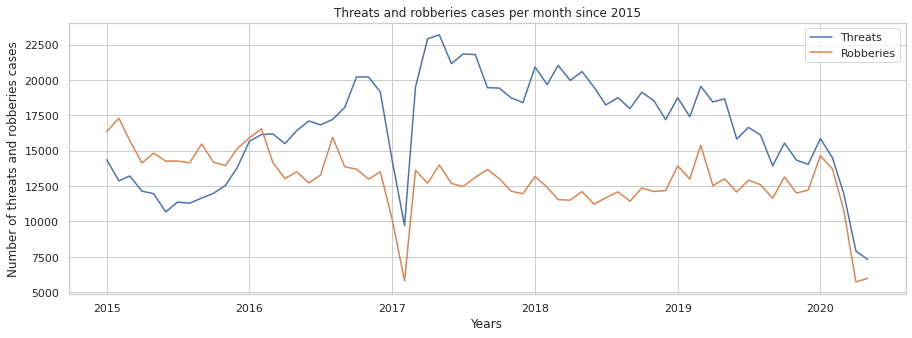

In [82]:
# plot line graph with values of threats and robberies
fig, ax = plt.subplots(figsize=(15, 5))

ax = sns.lineplot(x='date', y='total_roubos' ,data=df_violence_rj['2015-01-01':], label="Threats")
ax = sns.lineplot(x='date', y='total_furtos' ,data=df_violence_rj['2015-01-01':], label="Robberies")

ax.set_title("Threats and robberies cases per month since 2015")
ax.set_xlabel("Years")
ax.set_ylabel("Number of threats and robberies cases")
ax.legend()

In [83]:
# calculating the percentage variation of threats rate between 2018 and 2019
total_threats_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].total_roubos.sum()
total_threats_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].total_roubos.sum()

total_threats_inc = (1 - total_threats_2018 / total_threats_2019) * 100

print("Variation of threats rate in between 2018/2019: {}%".format(total_threats_inc.round(2)))

Variation of threats rate in between 2018/2019: -16.2%


In [84]:
# calculating the percentage variation of robbery rate between 2018 and 2019
total_robbery_2018 = df_violence_rj.loc[df_violence_rj['ano']==2018].total_furtos.sum()
total_robbery_2019 = df_violence_rj.loc[df_violence_rj['ano']==2019].total_furtos.sum()

total_robbery_inc = (1 - total_robbery_2018 / total_robbery_2019) * 100

print("Variation of robbery rate in between 2018/2019: {}%".format(total_robbery_inc.round(2)))

Variation of robbery rate in between 2018/2019: 6.89%


In [85]:
# getting dates when it was registered the peaks and botton values of threat and robbery
min_robb = df.total_furtos.min()
max_robb = df.total_furtos.max()
min_threats = df.total_roubos.min()
max_threats = df.total_roubos.max()

print("MIN threats on the period: {} ".format(min_threats))
print("MAX threats on the period: {} ".format(max_threats))
print("DATE lowest number of theats: {}".format(df[df['total_roubos']==min_threats].index[0]))
print("DATE highest number of theats: {}".format(df[df['total_roubos']==max_threats].index[0]))

print("MIN robberies on the period: {} ".format(min_robb))
print("MAX robberies on the period: {} ".format(max_robb))
print("DATE lowest number of robberies: {}".format(df[df['total_furtos']==min_robb].index[0]))
print("DATE highest number of robberies: {}".format(df[df['total_furtos']==max_robb].index[0]))

MIN threats on the period: 3261 
MAX threats on the period: 23203 
DATE lowest number of theats: 1991-02-01 00:00:00
DATE highest number of theats: 2017-05-01 00:00:00
MIN robberies on the period: 4691 
MAX robberies on the period: 18003 
DATE lowest number of robberies: 1995-11-01 00:00:00
DATE highest number of robberies: 2014-03-01 00:00:00


The threat rate has reached it's peak on the year of 2017, accounting 23,203 ocurrences within the same month. When it comes to robbery rate, it has reached it's peak on the year of 2014, with 18,003 registed ocurrences in a single month.

During first year of Mr Witzel governament, it was observed a -16.2% decrease on threats rate compared with 2018. However, the robbery rates are still in a ascendent movement, with a increase of 6.89%.

#### *Year of 2020*

The year of 2020 is atypical year where the world got hit by COVID-19 pandemic. Most of the countries worlwide have implemented social isolation and naturally the urban violence trend is to drop.

This article is being written when the most recent security statistics from Rio de Janeiro published is until June 2020.

Let's compare the police killings rates observed during 2020 until June against the same period within previous years.

For that purpose we will filter our dataframe by applying the following constraints:

*   `df_violence_rj.ano >= 2018`
*   `df_violence_rj.mes < 6`


In [86]:
# filter dataframe to df_violence_rj.ano >= 2018 and df_violence_rj.mes < 6
df_deaths_by_agents_monthly = df_violence_rj[(df_violence_rj.ano >= 2018) & (df_violence_rj.mes < 6)]

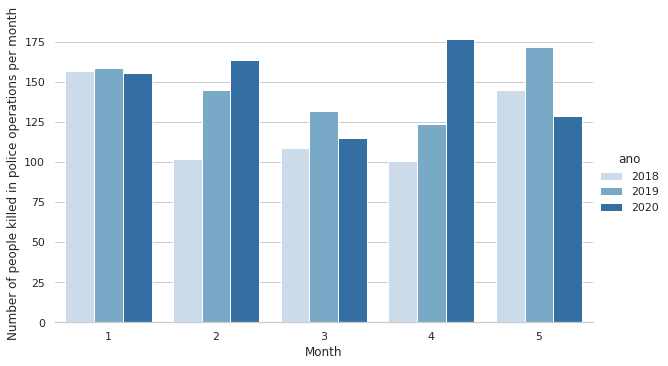

In [87]:
# plot bar graph for months comparison within the years of 2018, 2019 and 2020
sns.set(style="whitegrid")

g= sns.catplot(x='mes', y='hom_por_interv_policial', hue='ano', data=df_deaths_by_agents_monthly, kind='bar',
               height=5, aspect=1.7, palette="Blues")

g.despine(left=True)
g.set_ylabels("Number of people killed in police operations per month")
g.set_xlabels("Month")

## Conclusion

The police killing rate reached a unprecedented record on 2019, totalling 1,814 deaths within the year and a average of 151 people being killed during police operations per month. This impressive numbers are result of the rise on policies that include the use of heavily armed agents and helicopter-borne snipers to fight crime.

Out of the total of 1,814 deaths there are countless innocent people that were wrongfully targeted and died in the crossfire during police raids.  

Mr. Witzel celebrates the numbers on Twitter, saying his policies were "generating positive results month after month".

Based on official numbers published by Rio de Janeiro Governor, we could observe that only in 2018 the number of murders had a big reduction of -%31, before new Governor strategy of "police of confrontation" was implemented.

During first year of Mr. Witzel governament, the variation of murders rate in between 2018/2019 was of -23.63%, it was also observed a -16.2% decrease on threats rate if compared with 2018. However, the robbery rates are still in a ascendent movement, with a increase of 6.89%.

The main question that arises is: the solution for Rio de Janeiro violence is to give agents free hand to kill people?

The purpose of this analysis was to identify the positive and negative impacts for the population of Rio de Janeiro since the implementation of hardline measures on the State.